In [1]:
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
from jax import vmap

from kernels import (
    PolynomialKernel,
    GaussianKernel,
    LaplacianKernel,
    InverseMultiQuadraticKernel,
)

# Kernels

In [2]:
scaling_factors = np.arange(-100, 100).astype(float)

## Polynomial

The Polynomial Kernel is defined as:
$$k(x, y) = (⟨x, y⟩ + 1)^p$$
where $p \in \mathbb{N}$

(MMD Review Table 3.1)

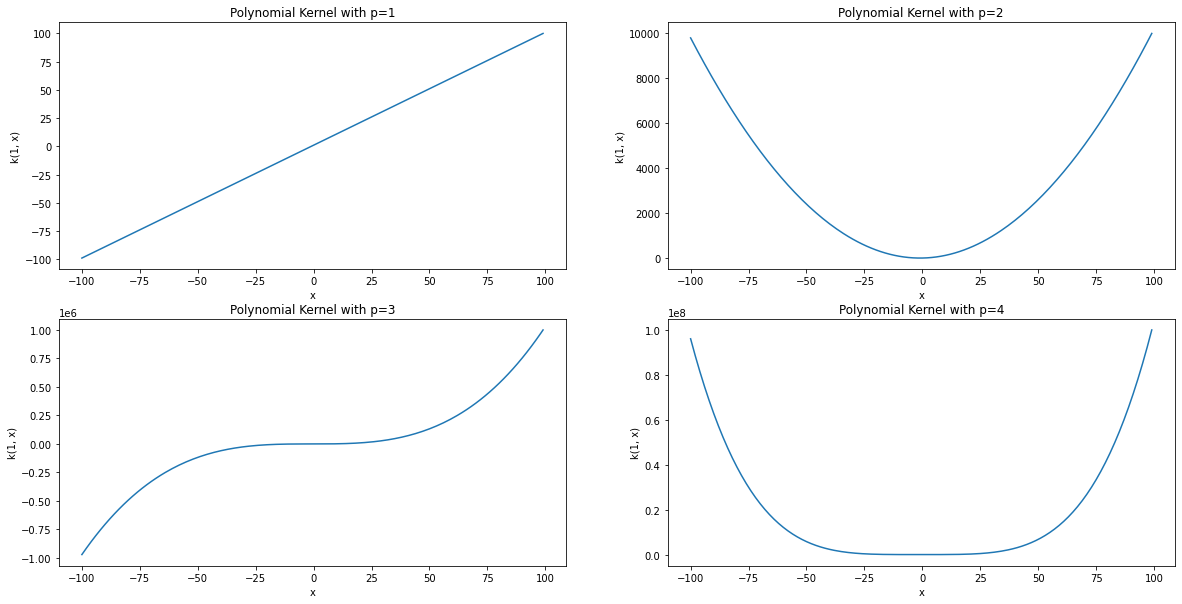

In [3]:
fig, axs = plt.subplots(2, 2)
fig.set_figheight(10)
fig.set_figwidth(20)
dimensions = 3
for i, p in enumerate(np.arange(1, 5)):
    fig = plt.plot()
    polynomial_kernel = PolynomialKernel(p)
    k_values = [
        polynomial_kernel.k(x=np.ones((dimensions,)), y=i * np.ones((dimensions,)))
        for i in scaling_factors
    ]
    ax_idx_0 = int(np.floor((p - 1) / 2))
    ax_idx_1 = (p - 1) % 2
    axs[ax_idx_0][ax_idx_1].plot(scaling_factors, k_values)
    axs[ax_idx_0][ax_idx_1].set_title(f"Polynomial Kernel with p={p}")
    axs[ax_idx_0][ax_idx_1].set_xlabel("x")
    axs[ax_idx_0][ax_idx_1].set_ylabel("k(1, x)")

We can visually recognise polynomial behaviour for each of the polynomial kernels

## Gaussian

The Gaussian Kernel is defined as:
$$k(x, y) = \exp(-\sigma||x-y||_2^2)$$
where $\sigma>0$.

(MMD Review Table 3.1)

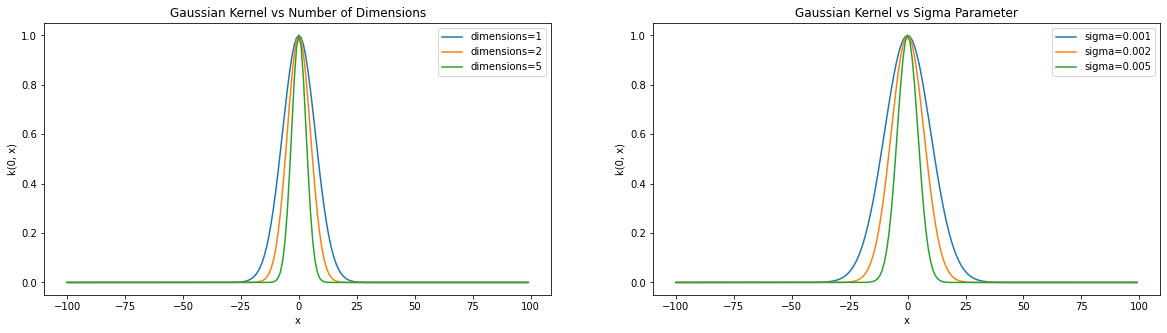

In [4]:
fig, axs = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(20)

sigma = 0.01
for dimensions in [1, 2, 5]:
    gaussian_kernel = GaussianKernel(sigma)
    k_values = [
        gaussian_kernel.k(x=np.zeros((dimensions, 1)), y=i * np.ones((dimensions, 1)))
        for i in scaling_factors
    ]
    axs[0].plot(scaling_factors, k_values, label=f"{dimensions=}")
    axs[0].legend()
    axs[0].set_title(f"Gaussian Kernel vs Number of Dimensions")
    axs[0].set_xlabel("x")
    axs[0].set_ylabel("k(0, x)")

for sigma in [1e-3, 2e-3, 5e-3]:
    gaussian_kernel = GaussianKernel(sigma)
    k_values = [
        gaussian_kernel.k(x=np.zeros((5, 1)), y=i * np.ones((5, 1)))
        for i in scaling_factors
    ]
    axs[1].plot(scaling_factors, k_values, label=f"{sigma=}")
    axs[1].legend()
    axs[1].set_title(f"Gaussian Kernel vs Sigma Parameter")
    axs[1].set_xlabel("x")
    axs[1].set_ylabel("k(0, x)")

For the Gaussian Kernel, we look at two possible factors which affect its value, the number of dimensions from the sample and the sigma parameter of the kernel. As dimension increases, the dot product of $(x_i-x_j)^T(x_i-x_j)$ for the L2 norm increases explaining the sharper peaks. Similarly, as the sigma parameter increases, the values inside the exponential is scaled up (negatively), also causing sharper peaks.

## Laplacian 

The Laplacian Kernel is defined as:
$$k(x, y) = \exp(-\sigma||x-y||_1)$$
where $\sigma>0$.

(MMD Review Table 3.1)

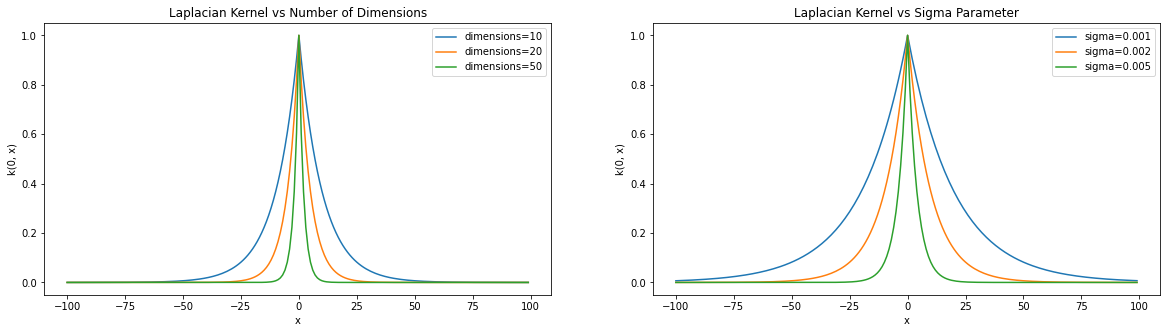

In [5]:
fig, axs = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(20)

sigma = 0.01
for dimensions in [10, 20, 50]:
    laplacian_kernel = LaplacianKernel(sigma)
    k_values = [
        laplacian_kernel.k(x=np.zeros((dimensions, 1)), y=i * np.ones((dimensions, 1)))
        for i in scaling_factors
    ]
    axs[0].plot(scaling_factors, k_values, label=f"{dimensions=}")
    axs[0].legend()
    axs[0].set_title(f"Laplacian Kernel vs Number of Dimensions")
    axs[0].set_xlabel("x")
    axs[0].set_ylabel("k(0, x)")

for sigma in [1e-3, 2e-3, 5e-3]:
    laplacian_kernel = LaplacianKernel(sigma)
    k_values = [
        laplacian_kernel.k(x=np.zeros((50, 1)), y=i * np.ones((50, 1)))
        for i in scaling_factors
    ]
    axs[1].plot(scaling_factors, k_values, label=f"{sigma=}")
    axs[1].legend()
    axs[1].set_title(f"Laplacian Kernel vs Sigma Parameter")
    axs[1].set_xlabel("x")
    axs[1].set_ylabel("k(0, x)")

Similar to the Gaussian Kernel, the Laplacian Kernel exhibits similar behaviours with respect to dimension and sigma. However, as the Laplacian Kernel uses the L1 norm, the distributions peak at a sharp point.

## Inverse Multi Quadratic

The Inverse Multi Quadratic Kernel is defined as:

$$k(x, y) =(c^2+||x-y||_2^2)^\beta$$
where $c>0$ and $\beta \in (-1, 0)$.

(KSD Review Page 22)

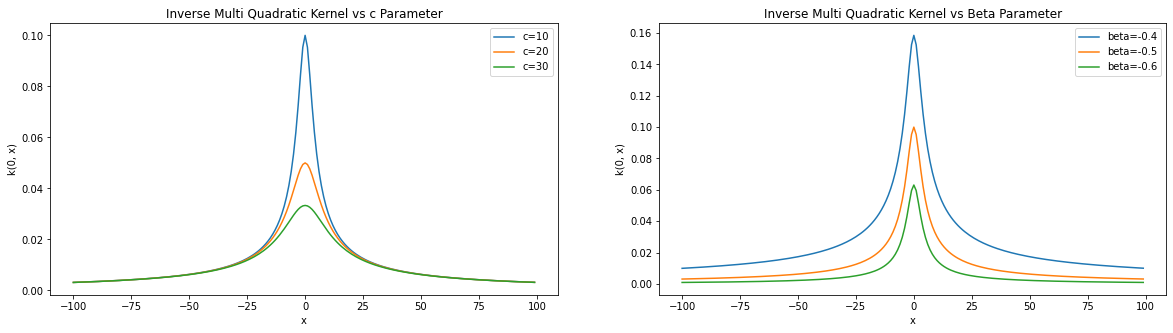

In [6]:
fig, axs = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(20)
dimensions = 10

beta = -0.5
for c in [10, 20, 30]:
    inverse_multi_quadratic_kernel = InverseMultiQuadraticKernel(c, beta)
    k_values = [
        inverse_multi_quadratic_kernel.k(
            x=np.zeros((dimensions, 1)), y=i * np.ones((dimensions, 1))
        )
        for i in scaling_factors
    ]
    axs[0].plot(scaling_factors, k_values, label=f"{c=}")
    axs[0].legend()
    axs[0].set_title(f"Inverse Multi Quadratic Kernel vs c Parameter")
    axs[0].set_xlabel("x")
    axs[0].set_ylabel("k(0, x)")

c = 10
for beta in [-0.4, -0.5, -0.6]:
    inverse_multi_quadratic_kernel = InverseMultiQuadraticKernel(c, beta)
    k_values = [
        inverse_multi_quadratic_kernel.k(
            x=np.zeros((dimensions, 1)), y=i * np.ones((dimensions, 1))
        )
        for i in scaling_factors
    ]
    axs[1].plot(scaling_factors, k_values, label=f"{beta=}")
    axs[1].legend()
    axs[1].set_title(f"Inverse Multi Quadratic Kernel vs Beta Parameter")
    axs[1].set_xlabel("x")
    axs[1].set_ylabel("k(0, x)")

For this kernel, we can see that qualitatively, the shape of the distirbution is inbetween the Gaussian and Laplacian kernels. The peak of the distribution is smooth like the Gaussian, however it approaches this peak quite sharply like the Laplacian. The c parameter changes the height of the peak while the beta parameter seems to apply a scaling factor to the entire distribution.

# Kernel Derivatives

The KSD also requires additional derivative quantites from the chosen kernel. These quantities include:

- dk_dx: $\nabla_x k(x, y)$
- dk_dy: $\nabla_y k(x, y)$
- dk_dxdy: $\nabla_x \nabla_y k(x, y)$
- trace_dk_dxdy: $Tr(\nabla_x \nabla_y k(x, y))$

## Inverse Multi Quadratic

For this example, we have implemented these quantities for the Inverse Multi Quadratic Kernel where:

$$k(x, y) =(c^2+||x-y||_2^2)^\beta$$

and

$$\nabla_x k(x, y) = 2\beta (c^2+||x-y||_2^2)^{\beta-1}(x-y)$$

and

$$\nabla_x k(x, y) = 2\beta (c^2+||x-y||_2^2)^{\beta-1}(y-x)$$

and

$$\nabla_x \nabla_y k(x, y) = 2\beta[2(\beta-1)(c^2+||x-y||_2^2)^{\beta-2}(y-x)(x-y)^T-(c^2+||x-y||_2^2)^{\beta-1}\mathbb{1}]$$

where $c>0$, $\beta \in (-1, 0)$ and $\mathbb{1}$ is the identity matrix.

To verify the derivatives from the distributions and kernels, we can approximate the gradient numerically with:

$$\frac{\partial f(x)}{\partial x} \simeq \frac{f(x+h)-f(x)}{h}$$

We would expect the norm of the vector between the analytical and numerical gradient to approach zero as $h$ approaches zero.


In [7]:
def calculate_numerical_derivative(
    f_x_h: np.ndarray, f_x: np.ndarray, h: float
) -> np.ndarray:
    return (f_x_h - f_x) / h

<Figure size 432x288 with 0 Axes>

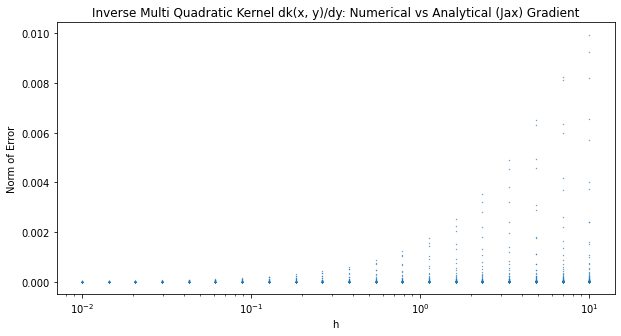

In [8]:
c = 10
beta = -0.5
dimensions = 10
inverse_multi_quadratic_kernel = InverseMultiQuadraticKernel(c, beta)
xs = np.repeat(scaling_factors, dimensions).reshape(-1, dimensions)
y = np.zeros((dimensions,))


hs = np.logspace(-2, 1, 20)
h_used = np.repeat(hs, len(scaling_factors)).reshape(len(scaling_factors), -1)

actual_gradient = vmap(lambda x: inverse_multi_quadratic_kernel.dk_dy(x, y))(xs)

numerical_gradients = vmap(
    lambda h: vmap(
        lambda x: vmap(
            lambda y_h: calculate_numerical_derivative(
                f_x_h=inverse_multi_quadratic_kernel.k(x, y_h),
                f_x=inverse_multi_quadratic_kernel.k(x, y),
                h=h,
            )
        )(y + h * np.eye(dimensions))
    )(xs)
)(hs)

error_norm = vmap(
    lambda numerical_gradient: jnp.linalg.norm(
        actual_gradient - numerical_gradient, axis=1
    )
)(numerical_gradients)

fig = plt.figure()
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(10)
fig.set_figheight(5)
ax.set_title(
    "Inverse Multi Quadratic Kernel dk(x, y)/dy: Numerical vs Analytical (Jax) Gradient"
)
ax.set_xscale("log")
ax.set_xlabel("h")
ax.set_ylabel("Norm of Error")
plt.scatter(h_used.flatten(), error_norm.flatten(), s=0.1)
plt.show()

<Figure size 432x288 with 0 Axes>

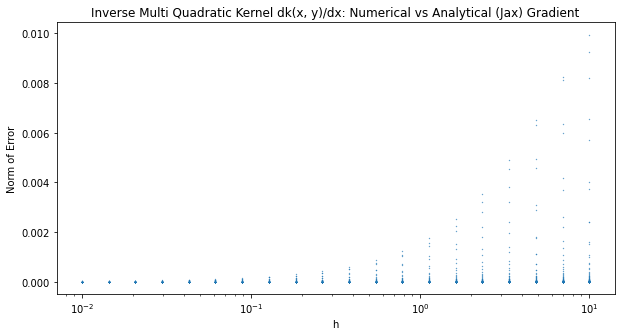

In [9]:
c = 10
beta = -0.5
dimensions = 10
inverse_multi_quadratic_kernel = InverseMultiQuadraticKernel(c, beta)
ys = np.repeat(scaling_factors, dimensions).reshape(-1, dimensions)
x = np.zeros((dimensions,))


hs = np.logspace(-2, 1, 20)
h_used = np.repeat(hs, len(scaling_factors)).reshape(len(scaling_factors), -1)

actual_gradient = vmap(lambda y: inverse_multi_quadratic_kernel.dk_dx(x, y))(ys)

numerical_gradients = vmap(
    lambda h: vmap(
        lambda y: vmap(
            lambda x_h: calculate_numerical_derivative(
                f_x_h=inverse_multi_quadratic_kernel.k(x_h, y),
                f_x=inverse_multi_quadratic_kernel.k(x, y),
                h=h,
            )
        )(x + h * np.eye(dimensions))
    )(ys)
)(hs)

error_norm = vmap(
    lambda numerical_gradient: jnp.linalg.norm(
        actual_gradient - numerical_gradient, axis=1
    )
)(numerical_gradients)

fig = plt.figure()
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(10)
fig.set_figheight(5)
ax.set_title(
    "Inverse Multi Quadratic Kernel dk(x, y)/dx: Numerical vs Analytical (Jax) Gradient"
)
ax.set_xscale("log")
ax.set_xlabel("h")
ax.set_ylabel("Norm of Error")
plt.scatter(h_used.flatten(), error_norm.flatten(), s=0.1)
plt.show()

<Figure size 432x288 with 0 Axes>

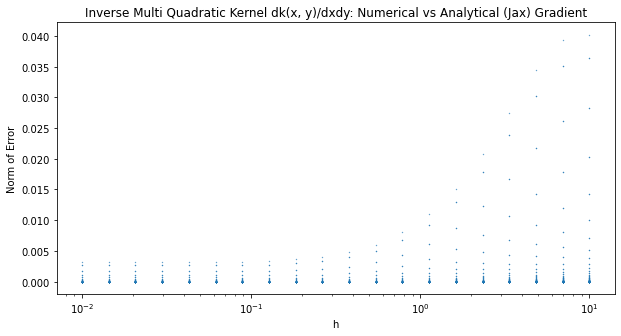

In [10]:
c = 10
beta = -0.5
dimensions = 10
inverse_multi_quadratic_kernel = InverseMultiQuadraticKernel(c, beta)
x = np.zeros((dimensions,)).astype(float)
ys = np.repeat(scaling_factors, dimensions).reshape(-1, dimensions)

hs = np.logspace(-2, 1, 20)
h_used = np.repeat(hs, len(scaling_factors)).reshape(len(scaling_factors), -1)

actual_gradient = vmap(lambda y: inverse_multi_quadratic_kernel.dk_dx_dy(x, y))(ys)

numerical_gradients = vmap(
    lambda h: vmap(
        lambda y: vmap(
            lambda x_h: vmap(
                lambda y_h: calculate_numerical_derivative(
                    f_x_h=inverse_multi_quadratic_kernel.k(x_h, y_h),
                    f_x=inverse_multi_quadratic_kernel.k(x, y),
                    h=h,
                )
            )(y + h * np.eye(dimensions))
        )(x + h * np.eye(dimensions))
    )(ys)
)(hs)

error_norm = vmap(
    lambda numerical_gradient: jnp.linalg.norm(
        actual_gradient - numerical_gradient, axis=(1, 2)
    )
)(numerical_gradients)

fig = plt.figure()
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(10)
fig.set_figheight(5)
ax.set_title(
    "Inverse Multi Quadratic Kernel dk(x, y)/dxdy: Numerical vs Analytical (Jax) Gradient"
)
ax.set_xscale("log")
ax.set_xlabel("h")
ax.set_ylabel("Norm of Error")
plt.scatter(h_used.flatten(), error_norm.flatten(), s=0.1)
plt.show()